In [2]:
from astroquery.mast import Observations

In [3]:
obs_table = Observations.query_object("NGC 2525",radius=".02 deg")


In [4]:
print(obs_table)

intentType obs_collection provenance_name ... srcDen  obsid        distance     
---------- -------------- --------------- ... ------ -------- ------------------
   science           TESS            SPOC ...    nan 26964537                0.0
   science           TESS            SPOC ...    nan 28364157                0.0
   science          SWIFT              -- ...    nan  1615202                0.0
   science          SWIFT              -- ...    nan  1615203                0.0
   science          SWIFT              -- ...    nan  1615204                0.0
   science          SWIFT              -- ...    nan  1615205                0.0
   science          SWIFT              -- ...    nan  1615206                0.0
   science          SWIFT              -- ...    nan  1615207                0.0
   science          SWIFT              -- ...    nan  1615208                0.0
   science          SWIFT              -- ...    nan  1615209                0.0
       ...            ...   

In [ ]:
obs_table1=Observations.query_criteria(dataproduct_type=["image"], objectname="NGC 2525", obs_collection="HST",  calib_level="3")
print(obs_table1)

In [21]:
from astropy.utils.data import download_file

In [7]:
from astropy.io import fits
from astropy.visualization import make_lupton_rgb, ImageNormalize
import matplotlib.pyplot as plt
import reproject

from astroquery.mast import Observations

result = Observations.query_object('M83')
selected_bands = result[(result['obs_collection'] == 'HST') &
                        (result['instrument_name'] == 'WFC3/UVIS') &
                        ((result['filters'] == 'F657N') |
                         (result['filters'] == 'F487N') |
                         (result['filters'] == 'F336W')) &
                        (result['target_name'] == 'MESSIER-083')]
prodlist = Observations.get_product_list(selected_bands)
filtered_prodlist = Observations.filter_products(prodlist)

downloaded = Observations.download_products(filtered_prodlist)

blue = fits.open(downloaded['Local Path'][2])
red = fits.open(downloaded['Local Path'][5])
green = fits.open(downloaded['Local Path'][8])

target_header = red['SCI'].header
green_repr, _ = reproject.reproject_interp(green['SCI'], target_header)
blue_repr, _ = reproject.reproject_interp(blue['SCI'], target_header)


rgb_img = make_lupton_rgb(ImageNormalize(vmin=0, vmax=1)(red['SCI'].data),
                          ImageNormalize(vmin=0, vmax=0.3)(green_repr),
                          ImageNormalize(vmin=0, vmax=1)(blue_repr),
                          stretch=0.1,
                          minimum=0,
                         )

plt.imshow(rgb_img, origin='lower', interpolation='none')


INFO: Found cached file ./mastDownload/HLA/hst_11360_61_wfc3_uvis_f336w/hst_11360_61_wfc3_uvis_f336w_daophot_trm.cat with expected size 30. [astroquery.query]
INFO: Found cached file ./mastDownload/HLA/hst_11360_61_wfc3_uvis_f336w/hst_11360_61_wfc3_uvis_f336w_sexphot_trm.cat with expected size 30. [astroquery.query]
INFO: Found cached file ./mastDownload/HLA/hst_11360_61_wfc3_uvis_f336w/hst_11360_61_wfc3_uvis_f336w_drz.jpg. [astroquery.query]
INFO: Found cached file ./mastDownload/HLA/hst_11360_61_wfc3_uvis_f336w/hst_11360_61_wfc3_uvis_f336w_drz.fits with expected size 409034880. [astroquery.query]
INFO: Found cached file ./mastDownload/HLA/hst_11360_61_wfc3_uvis_f336w_01/hst_11360_61_wfc3_uvis_f336w_01_drz.jpg. [astroquery.query]
INFO: Found cached file ./mastDownload/HLA/hst_11360_61_wfc3_uvis_f336w_01/hst_11360_61_wfc3_uvis_f336w_01_drz.fits with expected size 102254400. [astroquery.query]
INFO: Found cached file ./mastDownload/HLA/hst_11360_61_wfc3_uvis_f336w_02/hst_11360_61_wfc3_u

INFO: Found cached file ./mastDownload/HST/hst_11360_61_wfc3_uvis_f336w_ib6w61uq/hst_11360_61_wfc3_uvis_f336w_ib6w61uq_drc.jpg with expected size 1997783. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/hst_11360_61_wfc3_uvis_f336w_ib6w61uq/hst_11360_61_wfc3_uvis_f336w_ib6w61uq_drc.jpg with expected size 1997783. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/hst_11360_61_wfc3_uvis_f336w_ib6w61uq/hst_11360_61_wfc3_uvis_f336w_ib6w61uq_drc.fits with expected size 306921600. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/hst_11360_61_wfc3_uvis_f336w_ib6w61uq/hst_11360_61_wfc3_uvis_f336w_ib6w61uq_drc.fits with expected size 306921600. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/hst_11360_61_wfc3_uvis_f336w_ib6w61uq/hst_11360_61_wfc3_uvis_f336w_ib6w61uq_flc.fits with expected size 169263360. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/hst_11360_61_wfc3_uvis_f336w_ib6w61uq/hst_11360_61_wfc3_uvis_f336w_ib6w61uq_fl

INFO: Found cached file ./mastDownload/HST/hst_11360_62_wfc3_uvis_f487n_ib6w62s9/hst_11360_62_wfc3_uvis_f487n_ib6w62s9_hlet.fits with expected size 112320. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/hst_11360_62_wfc3_uvis_f487n_ib6w62s9/hst_11360_62_wfc3_uvis_f487n_ib6w62s9_hlet.fits with expected size 112320. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/hst_11360_62_wfc3_uvis_f487n_ib6w62s9/hst_11360_62_wfc3_uvis_f487n_ib6w62s9_trl.txt with expected size 7565. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/hst_11360_62_wfc3_uvis_f487n_ib6w62s9/hst_11360_62_wfc3_uvis_f487n_ib6w62s9_trl.txt with expected size 7565. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/hst_11360_62_wfc3_uvis_f487n_ib6w62s9/hst_11360_62_wfc3_uvis_f487n_ib6w62s9_drc.jpg with expected size 2072904. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/hst_11360_62_wfc3_uvis_f487n_ib6w62s9/hst_11360_62_wfc3_uvis_f487n_ib6w62s9_drc.jpg with ex

INFO: Found cached file ./mastDownload/HST/hst_11360_62_wfc3_uvis_f657n_ib6w62s5/hst_11360_62_wfc3_uvis_f657n_ib6w62s5_trl.txt with expected size 7596. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/hst_11360_62_wfc3_uvis_f657n_ib6w62s5/hst_11360_62_wfc3_uvis_f657n_ib6w62s5_trl.txt with expected size 7596. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/hst_11360_62_wfc3_uvis_f657n_ib6w62s5/hst_11360_62_wfc3_uvis_f657n_ib6w62s5_drc.jpg with expected size 2025446. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/hst_11360_62_wfc3_uvis_f657n_ib6w62s5/hst_11360_62_wfc3_uvis_f657n_ib6w62s5_drc.jpg with expected size 2025446. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/hst_11360_62_wfc3_uvis_f657n_ib6w62s5/hst_11360_62_wfc3_uvis_f657n_ib6w62s5_drc.fits with expected size 307051200. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/hst_11360_62_wfc3_uvis_f657n_ib6w62s5/hst_11360_62_wfc3_uvis_f657n_ib6w62s5_drc.fits with 

INFO: Found cached file ./mastDownload/HST/hst_11360_62_wfc3_uvis_total_ib6w62/hst_11360_62_wfc3_uvis_total_ib6w62_trl.txt with expected size 888579. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/hst_11360_62_wfc3_uvis_total_ib6w62/hst_11360_62_wfc3_uvis_total_ib6w62_trl.txt with expected size 888579. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/hst_11360_62_wfc3_uvis_total_ib6w62/hst_11360_62_wfc3_uvis_total_ib6w62_trl.txt with expected size 888579. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/hst_11360_62_wfc3_uvis_total_ib6w62/hst_11360_62_wfc3_uvis_total_ib6w62_drc.jpg with expected size 1506710. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/hst_11360_62_wfc3_uvis_total_ib6w62/hst_11360_62_wfc3_uvis_total_ib6w62_drc.jpg with expected size 1506710. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/hst_11360_62_wfc3_uvis_total_ib6w62/hst_11360_62_wfc3_uvis_total_ib6w62_drc.jpg with expected size 1506710. [a

INFO: Found cached file ./mastDownload/HST/ib6w61uqq/ib6w61uqq_spt.fits with expected size 103680. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/ib6w61uqq/ib6w61uqq_trl.fits with expected size 60480. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/ib6w61uqq/ib6w61uqq_log.txt with expected size 14894. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/ib6w61uqq/ib6w61uqq_raw.jpg with expected size 743980. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/ib6w61uqq/ib6w61uqq_flc.jpg with expected size 822372. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/ib6w61uqq/ib6w61uqq_flt.jpg with expected size 821968. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/ib6w61uqq/ib6w61uqq_flc.fits with expected size 169260480. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/ib6w61uqq/ib6w61uqq_flt.fits with expected size 169372800. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/ib6w61uqq/ib6

INFO: Found cached file ./mastDownload/HST/ib6w62020/ib6w62020_jif.fits with expected size 86400. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/ib6w62020/ib6w62020_jit.fits with expected size 132480. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/ib6w62020/ib6w62020_spt.fits with expected size 253440. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/ib6w62020/ib6w62020_trl.fits with expected size 624960. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/ib6w62020/ib6w62020_asn.fits with expected size 11520. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/ib6w62020/ib6w62020_log.txt with expected size 62. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/ib6w62020/ib6w62020_drc.jpg with expected size 2279462. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/ib6w62020/ib6w62020_drz.jpg with expected size 2278033. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/ib6w62020/ib6w62020_

INFO: Found cached file ./mastDownload/HST/ib6w62s1q/ib6w62s1q_raw.fits with expected size 34891200. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/ib6w62s3q/ib6w62s3q_flt_hlet.fits with expected size 63360. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/ib6w62s3q/ib6w62s3q_spt.fits with expected size 103680. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/ib6w62s3q/ib6w62s3q_trl.fits with expected size 60480. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/ib6w62s3q/ib6w62s3q_log.txt with expected size 14903. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/ib6w62s3q/ib6w62s3q_raw.jpg with expected size 553494. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/ib6w62s3q/ib6w62s3q_flc.jpg with expected size 942563. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/ib6w62s3q/ib6w62s3q_flt.jpg with expected size 941290. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/ib6w62s3q/ib6

INFO: Found cached file ./mastDownload/HST/ib6w62s6q/ib6w62s6q_flt.fits with expected size 169372800. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/ib6w62s6q/ib6w62s6q_raw.fits with expected size 34891200. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/ib6w62s8q/ib6w62s8q_flt_hlet.fits with expected size 112320. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/ib6w62s8q/ib6w62s8q_spt.fits with expected size 103680. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/ib6w62s8q/ib6w62s8q_trl.fits with expected size 60480. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/ib6w62s8q/ib6w62s8q_log.txt with expected size 14900. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/ib6w62s8q/ib6w62s8q_raw.jpg with expected size 817778. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/ib6w62s8q/ib6w62s8q_flc.jpg with expected size 1082163. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/ib6w62s

    Header size is not multiple of 2880: 1835355
There may be extra bytes after the last HDU or the file is corrupted. [astropy.io.fits.hdu.hdulist]


OSError: Empty or corrupt FITS file

In [8]:
selected_bands

intentType,obs_collection,provenance_name,instrument_name,project,filters,wavelength_region,target_name,target_classification,obs_id,s_ra,s_dec,dataproduct_type,proposal_pi,calib_level,t_min,t_max,t_exptime,em_min,em_max,obs_title,t_obs_release,proposal_id,proposal_type,sequence_number,s_region,jpegURL,dataURL,dataRights,mtFlag,srcDen,obsid,distance
str7,str11,str20,str13,str20,str36,str16,str32,str32,str65,float64,float64,str10,str21,int64,float64,float64,float64,float64,float64,str104,float64,str23,str20,int64,str1469,str185,str186,str6,bool,float64,str8,float64
science,HST,HAP,WFC3/UVIS,HAP,F336W,Optical,MESSIER-083,--,hst_11360_61_wfc3_uvis_f336w_ib6w61,204.2684583333,-29.85777777778,image,"OConnell, Robert W.",3,55069.30460336,55069.44341093,1890.0,305800000000.0,367300000000.0,--,55083.6666666,11360,HAP,--,POLYGON -155.76229399 -29.88935761 -155.69982687000004 -29.88935761 -155.69984475 -29.83220577 -155.76227611000002 -29.83220577 -155.76229399 -29.88935761 -155.76229399 -29.88935761,mast:HST/product/hst_11360_61_wfc3_uvis_f336w_ib6w61_drc.jpg,mast:HST/product/hst_11360_61_wfc3_uvis_f336w_ib6w61_drc.fits,PUBLIC,False,nan,26308983,0.0
science,HST,HAP,WFC3/UVIS,HAP,F487N,Optical,MESSIER-083,--,hst_11360_62_wfc3_uvis_f487n_ib6w62,204.2684583333,-29.85777777778,image,"OConnell, Robert W.",3,55068.82733484,55068.97087649,2700.0,483600000000.0,490800000000.0,--,55083.6666666,11360,HAP,--,POLYGON -155.76231130999997 -29.88928934 -155.69981884000003 -29.88928934 -155.69983672 -29.83213751 -155.76229340999998 -29.8321375 -155.76231130999997 -29.88928934 -155.76231130999997 -29.88928934,mast:HST/product/hst_11360_62_wfc3_uvis_f487n_ib6w62_drc.jpg,mast:HST/product/hst_11360_62_wfc3_uvis_f487n_ib6w62_drc.fits,PUBLIC,False,nan,26310637,0.0
science,HST,HAP,WFC3/UVIS,HAP,F657N,Optical,MESSIER-083,--,hst_11360_62_wfc3_uvis_f657n_ib6w62,204.2684583333,-29.85777777778,image,"OConnell, Robert W.",3,55068.72571447,55068.79320278,1484.0,649300000000.0,664900000000.0,--,55083.6666666,11360,HAP,--,POLYGON -155.76231130999997 -29.88928934 -155.69981884000003 -29.88928934 -155.69983672 -29.83213751 -155.76229340999998 -29.8321375 -155.76231130999997 -29.88928934 -155.76231130999997 -29.88928934,mast:HST/product/hst_11360_62_wfc3_uvis_f657n_ib6w62_drc.jpg,mast:HST/product/hst_11360_62_wfc3_uvis_f657n_ib6w62_drc.fits,PUBLIC,False,nan,26310644,0.0
science,HST,CALWF3,WFC3/UVIS,HST,F336W,Optical,MESSIER-083,GALAXY;SPIRAL;STAR FORMING REGIO,ib6w61060,204.2684583333,-29.85777777778,image,"OConnell, Robert W.",3,55069.30460335648,55069.443410914355,1890.0,305800000000.0,367300000000.0,Star Formation in Nearby Galaxies,55083.6666666,11360,GO/DD,--,POLYGON -155.75312226 -29.88525801 -155.75265559182071 -29.885210175751723 -155.75250071 -29.88598688 -155.75203402137865 -29.885939044017569 -155.75187914000003 -29.88671574 -155.69978674000004 -29.88136584 -155.70933041 -29.83678117 -155.70978727853711 -29.836823534602779 -155.70995229 -29.83605231 -155.71040913811734 -29.836094673019222 -155.71057415 -29.83532344 -155.76212434 -29.84009353 -155.75312226 -29.88525801 -155.75312226 -29.88525801,mast:HST/product/ib6w61060_drz.jpg,mast:HST/product/ib6w61060_drz.fits,PUBLIC,False,nan,24797327,0.0
science,HST,CALWF3,WFC3/UVIS,HST,F657N,Optical,MESSIER-083,GALAXY;SPIRAL;STAR FORMING REGIO,ib6w62010,204.2684583333,-29.85777777778,image,"OConnell, Robert W.",3,55068.72571446759,55068.79320277778,1484.0,649300000000.0,664900000000.0,Star Formation in Nearby Galaxies,55083.6666666,11360,GO/DD,--,POLYGON -155.752521 -29.885922 -155.75249555095203 -29.885919373299128 -155.75249099999996 -29.885942 -155.75204976116933 -29.885896458973345 -155.75189799999998 -29.886651 -155.69984399999998 -29.881267 -155.69984912356867 -29.881243292814919 -155.69982700000003 -29.881241 -155.70461799999998 -29.859064 -155.70507084755809 -29.859108632935939 -155.70522800000003 -29.858381 -155.70525629301864 -29.858383788462749 -155.705261 -29.858362 -155.75703799999997 -29.863454 -155.75252

In [9]:
result

intentType,obs_collection,provenance_name,instrument_name,project,filters,wavelength_region,target_name,target_classification,obs_id,s_ra,s_dec,dataproduct_type,proposal_pi,calib_level,t_min,t_max,t_exptime,em_min,em_max,obs_title,t_obs_release,proposal_id,proposal_type,sequence_number,s_region,jpegURL,dataURL,dataRights,mtFlag,srcDen,obsid,distance
str7,str11,str20,str13,str20,str36,str16,str32,str32,str65,float64,float64,str10,str21,int64,float64,float64,float64,float64,float64,str104,float64,str23,str20,int64,str1469,str185,str186,str6,bool,float64,str8,float64
science,WUPPE,--,ASTRO-2 WUPPE,--,--,UV,NGC5236,--,ngc5236_624812_2,204.25496327220003,-29.8645284872,spectrum,--,1,49782.78194444,49782.79453704,1088.0,1.522e+20,3.098e+20,--,nan,--,--,--,CIRCLE ICRS 204.2549632722 -29.8645284872 0.00166666666667,http://archive.stsci.edu/pub/browse/previews/astro/wuppe/gif/ngc5236_624812_2_hwa.gif,http://archive.stsci.edu/pub/vospectra/wuppe2/ngc5236_624812_2_hw_vo.fits,PUBLIC,--,5885.0,389332,0.0
science,WUPPE,--,ASTRO-2 WUPPE,--,--,UV,NGC5236,--,ngc5236_624814_2,204.25496327220003,-29.8645284872,spectrum,--,1,49793.45694444,49793.46361111,576.0,1.524e+20,3.094e+20,--,nan,--,--,--,CIRCLE ICRS 204.2549632722 -29.8645284872 0.00166666666667,http://archive.stsci.edu/pub/browse/previews/astro/wuppe/gif/ngc5236_624814_2_hwa.gif,http://archive.stsci.edu/pub/vospectra/wuppe2/ngc5236_624814_2_hw_vo.fits,PUBLIC,--,5885.0,389333,0.0
science,TESS,SPOC,Photometer,TESS,TESS,Optical,TESS FFI,--,tess-s0011-1-1,207.48262703335666,-36.983124059647075,image,"Ricker, George",3,58596.27576705,58623.37968302,1425.599394,600000000000.0,1000000000000.0,--,58651.5,N/A,--,11,POLYGON 197.52799200 -39.24854300 203.89031500 -29.02834100 217.08990300 -33.81116700 211.53079600 -44.91961400,--,--,PUBLIC,False,nan,27141980,0.0
science,SWIFT,--,UVOT,--,U,OPTICAL,CXOJ133705.14-295606.9,--,00031905002,204.28389912496402,-29.8855211560682,cube,--,2,55564.706169,55564.7752778,394.927700170472,3.014e+20,3.942e+20,--,nan,--,--,--,POLYGON -155.93325200000004 -29.892473 -155.82237199999997 -29.986037 -155.81268078769807 -29.993394812447868 -155.71326899999997 -30.081808 -155.70481369806214 -30.075168719847824 -155.70129299999996 -30.077834 -155.66205240924884 -30.04156971934481 -155.480679 -29.898651 -155.474902 -29.893063 -155.48793198074617 -29.880194721451289 -155.48100799999997 -29.873762 -155.583396 -29.789121 -155.59703867798319 -29.778849898686783 -155.68791 -29.697219 -155.69669830762535 -29.7037131690757 -155.711297 -29.692691 -155.822159 -29.788585 -155.88374784984541 -29.846217647746649 -155.92748900000004 -29.881116 -155.9243795385436 -29.884187322962138 -155.93325200000004 -29.892473 -155.93325200000004 -29.892473,http://archive.stsci.edu/cgi-bin/hla/fitscut.cgi?red=sw00031905002uuu[1]&size=ALL&output_size=1407,http://archive.stsci.edu/missions/swift_uvot/00031905/00031905002/sw00031905002uuu_sk.img,PUBLIC,--,5885.0,1441250,0.0
science,SWIFT,--,UVOT,--,U,OPTICAL,CXOJ133705.14-295606.9,--,00031905003,204.26289352784102,-29.8507046508678,cube,--,2,55565.5772917,55565.6562384,1618.487493708592,3.014e+20,3.942e+20,--,nan,--,--,--,POLYGON -155.95138399999996 -29.841936 -155.85504500000002 -29.940226 -155.77824546683578 -30.010787021820786 -155.744215 -30.047927 -155.485272 -29.881754 -155.50182712564413 -29.861900410063374 -155.50120900000002 -29.861425 -155.50878519389437 -29.853553031990735 -155.568102 -29.782321 -155.674211 -29.667511 -155.691110896714 -29.677653631646024 -155.70964800000002 -29.660831 -155.95138399999996 -29.841936 -155.95138399999996 -29.841936,http://archive.stsci.edu/cgi-bin/hla/fitscut.cgi?red=sw00031905003uuu[2]&size=ALL&output_size=1397,http://archive.stsci.edu/missions/swift_uvot/00031905/00031905003/sw00031905003uuu_sk.img,PUBLIC,--,5885.0,1459948,0.0
science,SWIFT,--,UVOT,--,U,OPTICAL,CXOJ133705.14-295606.9,--,00031905004,204.29191304592405,-29.855663397303,cube,--,2,55568.4031134,55568.6104167,2154.559471352099,3.014e+20,3.942e+20,--

In [35]:
result = Observations.query_object('NGC4594')


In [37]:
result

intentType,obs_collection,provenance_name,instrument_name,project,filters,wavelength_region,target_name,target_classification,obs_id,s_ra,s_dec,dataproduct_type,proposal_pi,calib_level,t_min,t_max,t_exptime,em_min,em_max,obs_title,t_obs_release,proposal_id,proposal_type,sequence_number,s_region,jpegURL,dataURL,dataRights,mtFlag,srcDen,obsid,distance
str7,str11,str12,str11,str10,str17,str16,str32,str32,str65,float64,float64,str10,str21,int64,float64,float64,float64,float64,float64,str111,float64,str17,str26,int64,str3331,str187,str188,str6,bool,float64,str8,float64
science,TESS,SPOC,Photometer,TESS,TESS,Optical,TESS FFI,--,tess-s0010-1-4,186.6135519467337,-15.818817866345437,image,"Ricker, George",3,58568.94280256,58595.17172854,1425.599391,600000000000.0,1000000000000.0,--,58635.3333334,N/A,--,10,POLYGON 194.80857300 -12.77452000 189.82720600 -23.70792400 178.09261800 -18.26316600 183.73924700 -8.16998100,--,--,PUBLIC,False,nan,27102874,0.0
science,TESS,SPOC,Photometer,TESS,TESS,Optical,32449963,--,tess2019085135100-s0010-0000000032449963-0140-s,189.9383860006667,-11.647101999734959,timeseries,"Ricker, George",3,58568.9302562,58595.18024502,120.0,600000000000.0,1000000000000.0,--,58635.3333334,N/A,--,10,CIRCLE ICRS 189.93838600 -11.64710200 0.00138889,--,mast:TESS/product/tess2019085135100-s0010-0000000032449963-0140-s_lc.fits,PUBLIC,False,nan,27067401,221.13189346430576
science,TESS,SPOC,Photometer,TESS,TESS,Optical,32449869,--,tess2019085135100-s0010-0000000032449869-0140-s,189.95820700000002,-11.504983999713204,timeseries,"Ricker, George",3,58568.9302562,58595.18024502,120.0,600000000000.0,1000000000000.0,--,58635.3333334,N/A,--,10,CIRCLE ICRS 189.95820700 -11.50498400 0.00138889,--,mast:TESS/product/tess2019085135100-s0010-0000000032449869-0140-s_lc.fits,PUBLIC,False,nan,27081356,442.2020070989367
science,TESS,SPOC,Photometer,TESS,TESS,Optical,32450216,--,tess2019085135100-s0010-0000000032450216-0140-s,190.03226400066671,-11.46588599970722,timeseries,"Ricker, George",3,58568.9302562,58595.18024502,120.0,600000000000.0,1000000000000.0,--,58635.3333334,N/A,--,10,CIRCLE ICRS 190.03226400 -11.46588600 0.00138889,--,mast:TESS/product/tess2019085135100-s0010-0000000032450216-0140-s_lc.fits,PUBLIC,False,nan,27079685,573.8572983760179
science,SWIFT,--,UVOT,--,UVW1,UV;OPTICAL,NGC4594,--,00035877001,190.02411050559294,-11.6446708816379,cube,--,2,54076.0593403,54076.3945949,568.4530390925096,1.609e+20,4.57e+20,--,nan,--,--,--,POLYGON -170.161521 -11.61463 -170.16044890555716 -11.61623306294511 -170.16057 -11.616315 -170.08692415206815 -11.726394378839965 -170.08405 -11.730807 -170.07502577094289 -11.743256694636322 -170.00827900000002 -11.840202 -170.00581715573517 -11.838688998040857 -170.00516200000004 -11.839592 -170.00380867496915 -11.838719755967496 -170.002658 -11.840272 -170.00233081744247 -11.840055986178514 -170.00171799999998 -11.840877 -169.90896373503628 -11.779134647977989 -169.767038 -11.69176 -169.76825168833776 -11.689801922150192 -169.76727 -11.689193 -169.7686581304408 -11.686979359433618 -169.76734499999998 -11.686131 -169.76796943950708 -11.685170479958307 -169.765898 -11.683789 -169.80638015510772 -11.623814082039409 -169.83268699999996 -11.584535 -169.836372073212 -11.579641536565607 -169.836662 -11.579202 -169.838720126524 -11.576466050772757 -169.91797199999996 -11.463642 -169.920549902764 -11.465115376821064 -169.922028 -11.46309 -169.92336321839704 -11.463887832961319 -169.92408 -11.462934 -169.92416983028815 -11.462989330578754 -169.925233 -11.461576 -170.041066 -11.533247 -170.068165865198 -11.551564942096046 -170.159378 -11.608889 -170.1585828444062 -11.610165417213558 -170.158865 -11.610342 -170.15836309633926 -11.611154904237756 -170.16087700000003 -11.612798 -170.16024538921627 -11.613768668499985 -170.161521 -11.61463 -170.161521 -11.61463,http://archive.stsci.edu/cgi-bin/hla/fitscut.cgi?red=sw00035877001uw1[4]&size=ALL&output_size=1385,http://archive.stsci.edu/missions/swift_uvot/00035877/00035877001

In [83]:
selected_bands = result[(result['obs_collection'] == 'HLA') &
                        (result['instrument_name'] == 'ACS/WFC') &
                        ((result['filters'] == 'F555W') |
                         (result['filters'] == 'F625W') |
                         (result['filters'] == 'F435W')) &
                         (result['calib_level'] == 3) &
                         ((result['obs_id'] == 'hst_mos_0093324_acs_wfc_f555w') |
                          (result['obs_id'] == 'hst_mos_0093324_acs_wfc_f625w') |
                          (result['obs_id'] == 'hst_mos_0093324_acs_wfc_f435w') )&
                        (result['target_name'] == 'NGC4594-POS6') 
 #                       (result['productType'] == 'SCIENCE')
                       ]
selected_bands

intentType,obs_collection,provenance_name,instrument_name,project,filters,wavelength_region,target_name,target_classification,obs_id,s_ra,s_dec,dataproduct_type,proposal_pi,calib_level,t_min,t_max,t_exptime,em_min,em_max,obs_title,t_obs_release,proposal_id,proposal_type,sequence_number,s_region,jpegURL,dataURL,dataRights,mtFlag,srcDen,obsid,distance
str7,str11,str12,str11,str10,str17,str16,str32,str32,str65,float64,float64,str10,str21,int64,float64,float64,float64,float64,float64,str111,float64,str17,str26,int64,str3331,str187,str188,str6,bool,float64,str8,float64
science,HLA,HLA,ACS/WFC,HLA,F555W,OPTICAL,NGC4594-POS6,--,hst_mos_0093324_acs_wfc_f555w,189.99753063600656,-11.621606633735757,image,Noll,3,52775.54015,52804.43088,12000.0,4.7e+20,6.2e+20,--,52804.58887727,9714,HLA,--,POLYGON J2000 190.00547040 -11.56485580 190.00546680 -11.56488264 190.00544080 -11.56488160 190.00267389 -11.58551898 190.00521630 -11.56436640 190.00434894 -11.56432523 189.97605160 -11.56298080 189.97604842 -11.56300725 189.97602220 -11.56300600 189.97601673 -11.56305145 189.97520190 -11.56301270 189.97519878 -11.56303866 189.97517220 -11.56303740 189.97506588 -11.56392109 189.95303170 -11.56304050 189.95302833 -11.56306560 189.95300080 -11.56306450 189.95299576 -11.56310207 189.95218180 -11.56306950 189.95217802 -11.56309772 189.95215260 -11.56309670 189.94937507 -11.58380518 189.95192670 -11.56258300 189.95190011 -11.56258174 189.92276320 -11.56119640 189.92276003 -11.56122272 189.92273230 -11.56122140 189.92272717 -11.56126405 189.92191330 -11.56122530 189.92191000 -11.56125273 189.92188410 -11.56125150 189.91555175 -11.61384953 189.91554857 -11.61387596 189.91554331 -11.61391968 189.91478130 -11.61388340 189.91477795 -11.61391120 189.91475070 -11.61390990 189.90798369 -11.67012797 189.90797220 -11.67022340 189.93714760 -11.67161060 189.93715082 -11.67158386 189.93717690 -11.67158510 189.93718216 -11.67154135 189.93799830 -11.67158010 189.93800144 -11.67155397 189.93802940 -11.67155530 189.93805567 -11.67133684 189.96577840 -11.67244450 189.96578188 -11.67241857 189.96581770 -11.67242000 189.96582299 -11.67238054 189.96663910 -11.67241310 189.96664258 -11.67238710 189.96667010 -11.67238820 189.96675050 -11.67178822 189.99064810 -11.67292370 189.99065144 -11.67289597 189.99067740 -11.67289720 189.99068254 -11.67285447 189.99129395 -11.67288349 189.99149860 -11.67289320 189.99150186 -11.67286607 189.99153840 -11.67286780 189.99156460 -11.67264996 190.01927890 -11.67375670 190.01928247 -11.67373007 190.01930820 -11.67373110 190.01931192 -11.67370332 190.02013707 -11.67374260 190.04514730 -11.67493190 190.04515055 -11.67490491 190.04517760 -11.67490620 190.04518309 -11.67486055 190.04599570 -11.67489920 190.04599876 -11.67487374 190.04602730 -11.67487510 190.04605346 -11.67465770 190.07377810 -11.67576590 190.07378174 -11.67573874 190.07381840 -11.67574020 190.07382344 -11.67570260 190.07463660 -11.67573510 190.07464024 -11.67570799 190.07466810 -11.67570910 190.08211600 -11.62014450 190.08174058 -11.62012952 190.08873240 -11.56796160 190.08826398 -11.56794290 190.06053220 -11.56683440 190.06052877 -11.56685999 190.06050140 -11.56685890 190.06049653 -11.56689522 190.05968080 -11.56686260 190.05967716 -11.56688972 190.05965160 -11.56688870 190.05688496 -11.58751987 190.05942750 -11.56637740 190.05823561 -11.56632076 190.03026370 -11.56499020 190.03026058 -11.56501612 190.03023290 -11.56501480 190.03022780 -11.56505721 190.02941230 -11.56501840 190.02940913 -11.56504474 190.02938310 -11.56504350 190.02929923 -11.56574038 190.00632010 -11.56482300 190.00631645 -11.56485023 190.00629080 -11.56484920 190.00628555 -11.56488837 190.00547040 -11.56485580 POLYGON J2000 190.05030586 -11.63930801 190.05230354 -11.62269841 190.05253216 -11.62270927 190.05030586 -11.63930801 POLYGON J2000 189.99781406 -11.62067781 189.99803341 -11.62068823 189.99589803 -11.63661409 189.99781406 -11.62067781 POLYGON J2000 189.94436110 -11.61888678 189.94459771 -11.61889801 189.94230

In [103]:
result = Observations.query_object('M1')
result

intentType,obs_collection,provenance_name,instrument_name,project,filters,wavelength_region,target_name,target_classification,obs_id,s_ra,s_dec,dataproduct_type,proposal_pi,calib_level,t_min,t_max,t_exptime,em_min,em_max,obs_title,t_obs_release,proposal_id,proposal_type,sequence_number,s_region,jpegURL,dataURL,dataRights,mtFlag,srcDen,obsid,distance
str7,str11,str12,str13,str9,str30,str16,str30,str32,str49,float64,float64,str10,str22,int64,float64,float64,float64,float64,float64,str73,float64,str20,str12,int64,str1251,str183,str184,str6,bool,float64,str8,float64
science,SWIFT,--,UVOT,--,UVW2,UV;OPTICAL,Crab,--,00030371002,83.62283017474772,22.0076020151159,cube,--,2,55461.696412,55461.7079282,979.2346639497,1.593e+20,3.37e+20,--,nan,--,--,--,POLYGON 83.538631 22.180938 83.450411 21.914252 83.594711 21.872786 83.735028 21.839284 83.820731 22.108608 83.697331 22.143572 83.538631 22.180938 83.538631 22.180938,http://archive.stsci.edu/cgi-bin/hla/fitscut.cgi?red=sw00030371002uw2[1]&size=ALL&output_size=1232,http://archive.stsci.edu/missions/swift_uvot/00030371/00030371002/sw00030371002uw2_sk.img,PUBLIC,--,5885.0,1507484,0.0
science,SWIFT,--,UVOT,--,UVM2,UV,Crab,--,00030371003,83.62195210327758,22.0062464834815,cube,--,2,55462.7666551,55462.8423495,964.1516653168592,1.679e+20,2.927e+20,--,nan,--,--,--,POLYGON 83.538399 22.180381 83.450476 21.91509 83.453769361727467 21.914145275693865 83.451047 21.905943 83.511477208178945 21.888514660147813 83.498458 21.849326 83.642078 21.807817 83.781418 21.774275 83.867169 22.04218 83.807116913335477 22.059329607863774 83.81984 22.099182 83.816659869802152 22.100085690041219 83.819293 22.108331 83.696496 22.143293 83.538399 22.180381 83.538399 22.180381,http://archive.stsci.edu/cgi-bin/hla/fitscut.cgi?red=sw00030371003um2[3]&size=ALL&output_size=1227,http://archive.stsci.edu/missions/swift_uvot/00030371/00030371003/sw00030371003um2_sk.img,PUBLIC,--,5885.0,1505436,0.0
science,SWIFT,--,UVOT,--,UVW1,UV;OPTICAL,Crab,--,00030371004,83.64117918822501,22.0226009103303,cube,--,2,55463.5803704,55463.5923495,1018.77185024234,1.609e+20,4.57e+20,--,nan,--,--,--,POLYGON 83.557819 22.190253 83.469591 21.924962 83.611197 21.884052 83.753028 21.849993 83.838433 22.117925 83.71382 22.153445 83.557819 22.190253 83.557819 22.190253,http://archive.stsci.edu/cgi-bin/hla/fitscut.cgi?red=sw00030371004uw1[1]&size=ALL&output_size=1227,http://archive.stsci.edu/missions/swift_uvot/00030371/00030371004/sw00030371004uw1_sk.img,PUBLIC,--,5885.0,1507485,0.0
science,SWIFT,--,UVOT,--,UVW1,UV;OPTICAL,Crab,--,00030371005,83.63787919138218,22.0059923901909,cube,--,2,55463.0447222,55463.0562384,978.843748315941,1.609e+20,4.57e+20,--,nan,--,--,--,POLYGON 83.555885 22.17731 83.509623 22.047877 83.467662 21.91202 83.60655 21.871946 83.751073 21.837329 83.836472 22.10526 83.712473 22.140502 83.555885 22.17731 83.555885 22.17731,http://archive.stsci.edu/cgi-bin/hla/fitscut.cgi?red=sw00030371005uw1[1]&size=ALL&output_size=1227,http://archive.stsci.edu/missions/swift_uvot/00030371/00030371005/sw00030371005uw1_sk.img,PUBLIC,--,5885.0,1507486,0.0
science,SWIFT,--,UVOT,--,UVW1,UV;OPTICAL,Crab,--,00030371006,83.63606466553927,22.0024638453419,cube,--,2,55463.2608333,55463.3092593,971.785475370995,1.609e+20,4.57e+20,--,nan,--,--,--,POLYGON 83.5418 22.174871 83.495851 22.045992 83.453902 21.909575 83.596097 21.868675 83.737014 21.834904 83.737970338341569 21.837914302794918 83.755523 21.833715 83.840934 22.101642 83.713628 22.137728 83.560357 22.173706 83.559374567066811 22.170757928478366 83.5418 22.174871 83.5418 22.174871,http://archive.stsci.edu/cgi-bin/hla/fitscut.cgi?red=sw00030371006uw1[1]&size=ALL&output_size=1226,http://archive.stsci.edu/missions/swift_uvot/00030371/00030371006/sw00030371006uw1_sk.img,PUBLIC,--,5885.0,1505437,0.0
science,SWIFT,--,UVOT,--,UVW1,UV;OPTICAL,Crab,--,00030371007,83.6380994245934,22.0274826314074,cube,--,2,55463.8376157,55463.8491204,978.485371156132,1.609e+20,4.57e+20,--,nan,--,--,--,POLYGON 83.554687 22.19

In [84]:
prodlist = Observations.get_product_list(selected_bands)
prodlist

obsID,obs_collection,dataproduct_type,obs_id,description,type,dataURI,productType,productGroupDescription,productSubGroupDescription,productDocumentationURL,project,prvversion,proposal_id,productFilename,size,parent_obsid,dataRights,calib_level
str8,str3,str5,str29,str64,str1,str104,str9,str28,str8,str1,str6,str20,str5,str42,int64,str8,str6,int64
25766522,HLA,image,hst_13364_0j_acs_wfc_f435w,HLA DAOPHOT Catalog,C,https://hla.stsci.edu/cgi-bin/getdata.cgi?download=1&filename=hst_13364_0j_acs_wfc_f435w_daophot_trm.cat,CATALOG,--,DAOPHOT,--,HLA,--,13364,hst_13364_0j_acs_wfc_f435w_daophot_trm.cat,--,26067707,PUBLIC,3
25766522,HLA,image,hst_13364_0j_acs_wfc_f435w,HLA SExtractor Catalog,C,https://hla.stsci.edu/cgi-bin/getdata.cgi?download=1&filename=hst_13364_0j_acs_wfc_f435w_sexphot_trm.cat,CATALOG,--,SEXPHOT,--,HLA,--,13364,hst_13364_0j_acs_wfc_f435w_sexphot_trm.cat,--,26067707,PUBLIC,3
25766522,HLA,image,hst_13364_0j_acs_wfc_f435w,Preview-Full,C,https://hla.stsci.edu/cgi-bin/preview.cgi?dataset=hst_13364_0j_acs_wfc_f435w,PREVIEW,--,--,--,HLA,--,13364,hst_13364_0j_acs_wfc_f435w_drz.jpg,--,26067707,PUBLIC,3
25766522,HLA,image,hst_13364_0j_acs_wfc_f435w,HLA simple fits science image,C,https://hla.stsci.edu/cgi-bin/getdata.cgi?dataset=hst_13364_0j_acs_wfc_f435w_drz.fits,SCIENCE,--,DRZ,--,HLA,--,13364,hst_13364_0j_acs_wfc_f435w_drz.fits,584444160,26067707,PUBLIC,3
25483354,HLA,image,hst_13364_0j_acs_wfc_f435w_01,Preview-Full,S,https://hla.stsci.edu/cgi-bin/preview.cgi?dataset=hst_13364_0j_acs_wfc_f435w_01,PREVIEW,--,--,--,HLA,--,13364,hst_13364_0j_acs_wfc_f435w_01_drz.jpg,--,26067707,PUBLIC,2
25483354,HLA,image,hst_13364_0j_acs_wfc_f435w_01,HLA simple fits science image,S,https://hla.stsci.edu/cgi-bin/getdata.cgi?dataset=hst_13364_0j_acs_wfc_f435w_01_drz.fits,SCIENCE,--,DRZ,--,HLA,--,13364,hst_13364_0j_acs_wfc_f435w_01_drz.fits,146154240,26067707,PUBLIC,2
25483355,HLA,image,hst_13364_0j_acs_wfc_f435w_02,Preview-Full,S,https://hla.stsci.edu/cgi-bin/preview.cgi?dataset=hst_13364_0j_acs_wfc_f435w_02,PREVIEW,--,--,--,HLA,--,13364,hst_13364_0j_acs_wfc_f435w_02_drz.jpg,--,26067707,PUBLIC,2
25483355,HLA,image,hst_13364_0j_acs_wfc_f435w_02,HLA simple fits science image,S,https://hla.stsci.edu/cgi-bin/getdata.cgi?dataset=hst_13364_0j_acs_wfc_f435w_02_drz.fits,SCIENCE,--,DRZ,--,HLA,--,13364,hst_13364_0j_acs_wfc_f435w_02_drz.fits,146154240,26067707,PUBLIC,2
25542061,HLA,image,hst_9714_01_acs_wfc_f435w_01,Preview-Full,S,https://hla.stsci.edu/cgi-bin/preview.cgi?dataset=hst_9714_01_acs_wfc_f435w_01,PREVIEW,--,--,--,HLA,--,9714,hst_9714_01_acs_wfc_f435w_01_drz.jpg,--,26067707,PUBLIC,2


In [93]:
filtered_prodlist = Observations.filter_products(prodlist,productType='SCIENCE',productSubGroupDescription='DRZ',obs_collection='HLA',type='C', productGroupDescription='Minimum Recommended Products')

In [94]:
filtered_prodlist

obsID,obs_collection,dataproduct_type,obs_id,description,type,dataURI,productType,productGroupDescription,productSubGroupDescription,productDocumentationURL,project,prvversion,proposal_id,productFilename,size,parent_obsid,dataRights,calib_level
str8,str3,str5,str29,str64,str1,str104,str9,str28,str8,str1,str6,str20,str5,str42,int64,str8,str6,int64
26067707,HLA,image,hst_mos_0093324_acs_wfc_f435w,HLA simple fits science image,C,https://hla.stsci.edu/cgi-bin/getdata.cgi?dataset=hst_mos_0093324_acs_wfc_f435w_drz.fits,SCIENCE,Minimum Recommended Products,DRZ,--,HLA,--,0,hst_mos_0093324_acs_wfc_f435w_drz.fits,2721922560,26067707,PUBLIC,3
26067708,HLA,image,hst_mos_0093324_acs_wfc_f555w,HLA simple fits science image,C,https://hla.stsci.edu/cgi-bin/getdata.cgi?dataset=hst_mos_0093324_acs_wfc_f555w_drz.fits,SCIENCE,Minimum Recommended Products,DRZ,--,HLA,--,9714,hst_mos_0093324_acs_wfc_f555w_drz.fits,2721908160,26067708,PUBLIC,3
26067709,HLA,image,hst_mos_0093324_acs_wfc_f625w,HLA simple fits science image,C,https://hla.stsci.edu/cgi-bin/getdata.cgi?dataset=hst_mos_0093324_acs_wfc_f625w_drz.fits,SCIENCE,Minimum Recommended Products,DRZ,--,HLA,--,9714,hst_mos_0093324_acs_wfc_f625w_drz.fits,2721908160,26067709,PUBLIC,3


In [95]:
downloaded = Observations.download_products(filtered_prodlist)

In [96]:
downloaded

Local Path,Status,Message,URL
str87,str8,object,object
./mastDownload/HLA/hst_mos_0093324_acs_wfc_f435w/hst_mos_0093324_acs_wfc_f435w_drz.fits,COMPLETE,None,None
./mastDownload/HLA/hst_mos_0093324_acs_wfc_f555w/hst_mos_0093324_acs_wfc_f555w_drz.fits,COMPLETE,None,None
./mastDownload/HLA/hst_mos_0093324_acs_wfc_f625w/hst_mos_0093324_acs_wfc_f625w_drz.fits,COMPLETE,None,None


In [98]:
downloaded['Local Path'][1]

'./mastDownload/HLA/hst_mos_0093324_acs_wfc_f555w/hst_mos_0093324_acs_wfc_f555w_drz.fits'

In [99]:
blue = fits.open(downloaded['Local Path'][0])
red = fits.open(downloaded['Local Path'][1])
green = fits.open(downloaded['Local Path'][2])

In [100]:
red['SCI'].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                16200                                                  
NAXIS2  =                10500                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
INHERIT =                    T / inherit the primary header                     
EXTNAME = 'SCI     '           / extension name                                 
EXTVER  =                    1                                                  
BUNIT   = 'ELECTRONS/S'        / Units of science product                       
                                                                                
CD1_1   = -1.1111111111111E-

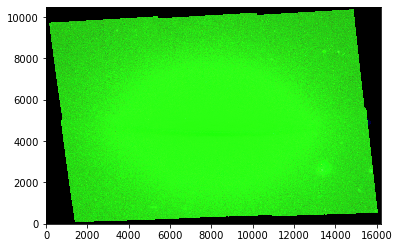

In [101]:
target_header = red['SCI'].header
green_repr, _ = reproject.reproject_interp(green['SCI'], target_header)
blue_repr, _ = reproject.reproject_interp(blue['SCI'], target_header)


rgb_img = make_lupton_rgb(ImageNormalize(vmin=0, vmax=1)(red['SCI'].data),
                          ImageNormalize(vmin=0, vmax=0.3)(green_repr),
                          ImageNormalize(vmin=0, vmax=1)(blue_repr),
                          stretch=0.1,
                          minimum=0,
                         )

plt.imshow(rgb_img, origin='lower', interpolation='none')
